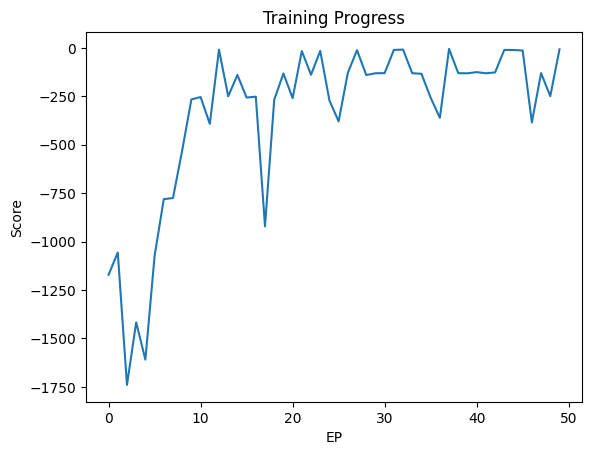

In [3]:
# Plotting the scores
plt.plot(score_list)
plt.xlabel('EP')
plt.ylabel('Score')
plt.title('Training Progress')
plt.show()

In [5]:
# Define a function to run test EPs
def run_test_EPs(env, agent, EPOCHS=10):
    scores = []
    for EP in range(EPOCHS):
        state, info = env.reset()
        total_reward = 0
        done = False

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            # Select an action based on the current state
            action, action_index = agent.select_action(state_tensor)
            # Perform the action in the environment
            next_state, reward, done, truncated, _ = env.step([action])
            if done or truncated:
                done = True

        scores.append(total_reward)
        print(f"Test Episodes {EP+1}: Total Reward: {total_reward}")

    env.close()
    return scores

# Load the saved model
agent.model.load_state_dict(torch.load('pendulum_dqn_model.pth'))

# Create a new environment for testing
test_env = gym.make('Pendulum-v1', render_mode='human')

# Run test EPs
test_scores = run_test_EPs(test_env, agent, EPOCHS=10)

# Calculate and print the average score
average_score = sum(test_scores) / len(test_scores)
print(f"Average Score over {len(test_scores)} Episodes: {average_score}")

# Plot the test scores
plt.plot(test_scores)
plt.xlabel('Test Episode')
plt.ylabel('Score')
plt.title('Test Scores of the Trained Model')
plt.show()


Test Episodes 1: Total Reward: 0
Test Episodes 2: Total Reward: 0
Test Episodes 3: Total Reward: 0
Test Episodes 4: Total Reward: 0
Test Episodes 5: Total Reward: 0
Test Episodes 6: Total Reward: 0


KeyboardInterrupt: 

: 